# Assignment 3 : Exploring `scikit-learn`

Scikit-learn provides a range of supervised and unsupervised learning algorithms via a consistent interface in Python. In this assigment you'll explore different features of the `scikit-learn` library by training a variety of classifiers on the Diabetic Retinopathy Dataset.

In [1]:
#Name Here: 
#Peijie Yang
#py2554
#Pengdi Xia
#px353
import warnings
warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
# Reading the data from file
col_names = []
for i in range(20):
    if i == 0:
        col_names.append('quality')
    if i == 1:
        col_names.append('prescreen')
    if i >= 2 and i <= 7:
        col_names.append('ma' + str(i))
    if i >= 8 and i <= 15:
        col_names.append('exudate' + str(i))
    if i == 16:
        col_names.append('euDist')
    if i == 17:
        col_names.append('diameter')
    if i == 18:
        col_names.append('amfm_class')
    if i == 19:
        col_names.append('label')

data = pd.read_csv("messidor_features.txt", names = col_names)
print(data.shape)
data.head(10)
label = data['label']
data = data.drop(labels = ['label'],axis=1)

(1151, 20)


### 1. Data preprocessing in `sklearn`

Q1. Use `sklearn.preprocessing.StandardScaler` to standardize the dataset’s features onto unit scale (mean = 0 and variance = 1). This will be required for running the principal component analysis (PCA). Split your dataset into training and test sets (eg. 75% - 25% split). You can use `sklearn.model_selection.train_test_split` to help you in this task.

In [4]:
# your code goes here
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
data_standard=sk.preprocessing.StandardScaler().fit(data).transform(data)
X_train1 , X_test1 =train_test_split(data_standard, test_size=0.25)

feature_cols = list(data.columns[:-1])
label_col = data.columns[-1]
x_all = data[feature_cols]
y_all = data[label_col]
result = []
for x in range(len(data_standard)):
    result.append(data_standard[x])

X_train , X_test , y_train, y_test =train_test_split(data_standard,label,test_size=0.25)

Q2. PCA is affected by scale of the features that is why it is important to normalize the dataset. The principle components generated by PCA are sensistive to the shape of the data cloud which is an ellipsoid in n-dimensional space. Carry out a principal components analysis using `sklearn.decomposition.PCA` and use the `pca.explained_variance_ratio_` field to plot the individual and cumulative variance. Assess how many principal components are needed so that 95% variance is retained. You'll use this dataset for subsequent tasks.

Note that you are fitting PCA on the **training set** only. Remember to transform the **test set** to the principal component space.

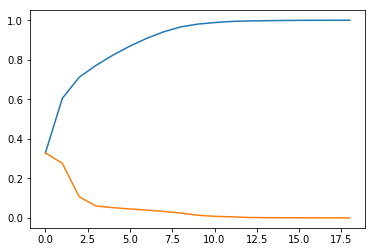

In [5]:
# your code goes here
from sklearn.decomposition import PCA
i = 0
result1 = []
result2 = []
pca = PCA().fit(X_train1)
X_train1 = pca.transform(X_train1)
X_test1 = pca.transform(X_test1)
exp_var = pca.explained_variance_ratio_

for x in range(len(pca.explained_variance_)):
    i += exp_var[x]
    result2.append(exp_var[x])
    result1.append(i)
plt.plot([x for x in result1])
plt.plot([x for x in result2])

### 2. Training Simple Classifiers in `scikit-learn`
We will begin by building simple models using `sklearn`, calibrate them, and finally try to combine them into an ensemble classifier. Play around and tweak different parameters of the classifiers to optimise the model.

#### A. Decision Trees (DT)

Q3. Use `sklearn.tree.DecisionTreeClassifier` and fit the classifier on the training set with entropy as the split criterion. Tweak parameters like `min_impurity_decrease`, `min_samples_leaf` and `min_samples_split` to optimise accuracy, precision and recall. Display the precision, recall and accuracy on the test set.

In [6]:
# your code goes here
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import cross_val_score
clf_dt = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease = 0,min_samples_split=3, min_samples_leaf=10)
accuracy_score = cross_val_score(clf_dt, data_standard, label, scoring='accuracy', cv = 10)
print("accuracy = "+str(accuracy_score.mean()*100))
precision_score = cross_val_score(clf_dt, data_standard, label, scoring='precision', cv = 10)
print("precision = "+str(precision_score.mean()*100))
recall_score = cross_val_score(clf_dt, data_standard, label, scoring='recall', cv = 10)
print("recall = "+str(recall_score.mean()*100))

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


accuracy = 62.7263868066
precision = 65.1912121719
recall = 64.1591750397


#### B. K Nearest Neighbour (KNN)

Q4. Here you'll use `sklearn.neighbors.KNeighborsClassifier` and repeat the problem of tuning the best value of k for the given dataset from HW2. `StratifiedKFold` is a variant of k fold cross validation which preserves the percentage of samples for each class. Try values of k between `[1-30]`, for each k, run 10 fold CV using `StratifiedKFold` and record the average misclassification error. Plot the number of neighbors vs. the misclassification error and use this graph to calculate the optimal value of k. Use this k and compute the precision, recall and accuracy on the test set.

best k is 27
accuracy = 65.4190404798


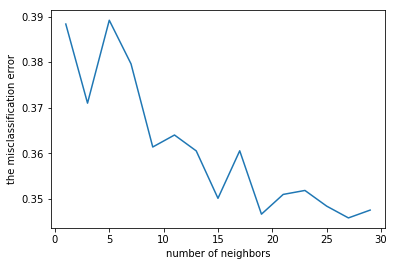

In [7]:
# your code goes here
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
k_list = []
lowest = 100
lowest_k = 40
for i in range(1,30,2):
    skf = StratifiedKFold(n_splits=10,shuffle = False)
    error_rate = 0.0
    for train_index, test_index in skf.split(data_standard, label):
        temp = []
        X_train1, X_test1 = data_standard[train_index], data_standard[test_index]
        y_train1, y_test1 = label[train_index], label[test_index]
        clf_knn = KNeighborsClassifier(n_neighbors=i)
        clf_knn = clf_knn.fit(X_train1,y_train1)
        pred = clf_knn.predict(X_test1)
        accuracy_score1 = accuracy_score(y_test1,pred)
        acc_avg = accuracy_score1.mean()
        error_rate += 1- acc_avg
    error_avg = error_rate/10
    if(error_avg < lowest):
        lowest = error_avg
        lowest_k = i
    k_list.append(error_avg)
plt.plot([x for x in range(1,30,2)],[y for y in k_list])
plt.xlabel('number of neighbors')
plt.ylabel('the misclassification error')
clf_knn = KNeighborsClassifier(n_neighbors=lowest_k)
print("best k is "+str(lowest_k))
accuracy_score = cross_val_score(clf_knn, data_standard, label, scoring='accuracy',cv=10)
print("accuracy = "+str(accuracy_score.mean()*100))   

#### C. Naive Bayes (NB)

`GaussianNB` implements the Gaussian Naive Bayes algorithm for classification. The likelihood of the features is assumed to be Gaussian:

$$P(x_i|y) = \frac{1}{\sqrt{2\pi\sigma_y^2}}\exp\big(-\frac{{(x_i - \mu_i)}^2}{2\sigma_y^2}\big)$$

Q5. Use `sklearn.naive_bayes.GaussianNB` and fit the classifier on the training set. Display precision, recall and accuracy on the test set.

In [8]:
# your code goes here
from sklearn.naive_bayes import GaussianNB
clf_nb = GaussianNB()
accuracy_score = cross_val_score(clf_nb, data_standard, label, scoring='accuracy', cv = 10)
print("accuracy = "+str(accuracy_score.mean()*100))

accuracy = 62.9865067466


#### D. Support Vector Machines (SVM)

Q6. Fit a SVM classifier using the polynomial kernel (`poly`) with degree 5 on the training set. Plot a Receiver Operating Characteristic (ROC) curve to evaluate classifier output quality. Use the plot to calculate AUC.

accuracy = 61.3395802099


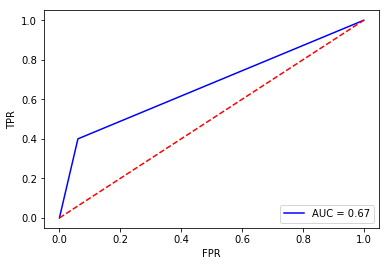

In [9]:
# your code goes here
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
# from sklearn.linear_model import LogisticRegression
clf_svm = SVC(kernel = 'poly',degree=5)
accuracy_score = cross_val_score(clf_svm, data_standard, label, scoring='accuracy', cv = 10)
print("accuracy = "+str(accuracy_score.mean()*100))
clf_svm = clf_svm.fit(data_standard, label)
test_array = clf_svm.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, test_array)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate, 'blue',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

Q7. Repeat Q6 for a SVM classifier with the radial basis kernel (`rbf`).

accuracy = 69.8553223388


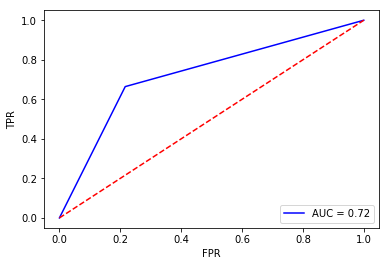

In [10]:
# your code goes here
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
# from sklearn.linear_model import LogisticRegression
clf_rbf = SVC(kernel = 'rbf')
accuracy_score = cross_val_score(clf_rbf, data_standard, label, scoring='accuracy', cv = 10)
print("accuracy = "+str(accuracy_score.mean()*100))
clf_rbf = clf_rbf.fit(X_train, y_train)
test_array = clf_rbf.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, test_array)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()



#### E. Neural Networks (NN)

Q8. Train a multi-layer perceptron with a single hidden layer. Experiment with different activation functions (`identity`, `logistic`, `tanh`, `relu`), learning rates, momentum, etc. and optimise your classifier. Use `GridSearchCV` along with 5 fold cross validation to find the best hidden layer size for the `MLPClassifier`. Try values `hidden_layer_sizes` ranging from `(5,)` to `(60,)` with gaps of 5.

In [11]:
# your code goes here
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
parameters = [{'hidden_layer_sizes':[(i,) for i in range(5,61,5)]}]
mlp = MLPClassifier(activation='identity')
clf_nn = GridSearchCV(mlp, parameters,cv =5)
accuracy_score = cross_val_score(clf_nn, data_standard, label, scoring='accuracy')
print("accuracy = "+str(accuracy_score.mean()*100))
clf_nn.fit(data_standard, label)
size = clf_nn.best_params_["hidden_layer_sizes"]
print("best size: " + str(size))


accuracy = 72.0234533652
best size: (55,)


### 3. Ensemble Classifiers

Ensemble classifiers combine the predictions of multiple base estimators to improve the variance of the predictions. One of the key assumptions that ensemble classifiers make is that the base estimators are built independently.

#### A. Random Forests 

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting.

Q9. Using `sklearn.ensemble.RandomForestClassifier` train a random forest classifier on the training set. Split the training set into a small training set and a validation set. Tune the hyperparameters on the validation set. Display precision, recall and accuracy on the test set. Compare your results to the Decision Tree you trained in Q3.

In [12]:
# your code goes here
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
parameters=[{'criterion':['entropy','gini'],
            'min_samples_split':[2,3],
            'min_samples_leaf':[10,11,12],
            'min_impurity_decrease':[0,0.1,0.2]}]
clf_rf = GridSearchCV(RandomForestClassifier(random_state = 10), parameters,cv =5)
accuracy_score = cross_val_score(clf_rf, data_standard, label, scoring='accuracy',cv=10)
print("accuracy = "+str(accuracy_score.mean()*100))
precision_score = cross_val_score(clf_rf, data_standard, label, scoring='precision', cv = 10)
print("precision = "+str(precision_score.mean()*100))
recall_score = cross_val_score(clf_rf, data_standard, label, scoring='recall', cv = 10)
print("recall = "+str(recall_score.mean()*100))

accuracy = 67.1611694153
precision = 70.4881113721
recall = 66.1316763617


#### B. AdaBoost

Random Forests are a kind of averaging ensemble classifier, where the driving principle is to build several estimators independently and then to average their predictions. In contrast, there is another class of training ensemble classifiers called *boosting* methods. Here the classifiers are trained one-by-one and each time the sampling of the training set depends on the performance of previously generated models.

Q10. Train an AdaBoost classifier on the training data. Try different kinds of `base_estimator` and compare their results with the results you got in the previous section.

In [13]:
# your code goes here
from sklearn.ensemble import AdaBoostClassifier

ada_dt = AdaBoostClassifier(base_estimator =clf_dt)
accuracy_score = cross_val_score(ada_dt, data_standard, label, scoring='accuracy')
print("dt_accuracy = "+str(accuracy_score.mean()*100))

ada_nb = AdaBoostClassifier(base_estimator =clf_nb)
accuracy_score = cross_val_score(ada_nb, data_standard, label, scoring='accuracy')
print("nb_accuracy = "+str(accuracy_score.mean()*100))


dt_accuracy = 64.9851773281
nb_accuracy = 51.7814403829


In [14]:
# ada_dt's accuracy is higher than dt
# ada_nb's accuracy is drastically lower than nb